In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np


In [4]:
# -*- coding: utf-8 -*-
"""
pydot example 2
@author: Federico Cáceres
@url: http://pythonhaven.wordpress.com/2009/12/09/generating_graphs_with_pydot
"""
import pydot

# this time, in graph_type we specify we want a DIrected GRAPH
graph = pydot.Dot(graph_type='digraph')

# in the last example, we did no explicitly create nodes, we just created the edges and
# they automatically placed nodes on the graph. Unfortunately, this way we cannot specify
# custom styles for the nodes (although you CAN set a default style for all objects on
# the graph...), so let's create the nodes manually.

# creating nodes is as simple as creating edges!
node_a = pydot.Node("Node A", style="filled", fillcolor="red")
# but... what are all those extra stuff after "Node A"?
# well, these arguments define how the node is going to look on the graph,
# you can find a full reference here:
# http://www.graphviz.org/doc/info/attrs.html
# which in turn is part of the full docs in
# http://www.graphviz.org/Documentation.php

# neat, huh? Let us create the rest of the nodes!
node_b = pydot.Node("Node B", style="filled", fillcolor="green")
node_c = pydot.Node("Node C", style="filled", fillcolor="#0000ff")
node_d = pydot.Node("Node D", style="filled", fillcolor="#976856")

#ok, now we add the nodes to the graph
graph.add_node(node_a)
graph.add_node(node_b)
graph.add_node(node_c)
graph.add_node(node_d)

# and finally we create the edges
# to keep it short, I'll be adding the edge automatically to the graph instead
# of keeping a reference to it in a variable
graph.add_edge(pydot.Edge(node_a, node_b))
graph.add_edge(pydot.Edge(node_b, node_c))
graph.add_edge(pydot.Edge(node_c, node_d))
# but, let's make this last edge special, yes?
graph.add_edge(pydot.Edge(node_d, node_a, label="and back we go again", labelfontcolor="#009933", fontsize="10.0", color="blue"))

# and we are done
graph.write_png('tree.png')

# this is too good to be true!

True

In [57]:
node_b.set_style('filled')
node_b.set_color('yellow')
graph.write_png('tree.png')
!open tree.png

In [42]:
%%writefile twoblobs.dot
graph G {
0 [style=filled,color=black];
1 [style=filled,color=black];
2 [style=filled,color=black];
3 [style=filled,color=black];
4 [style=filled,color=black];
5 [style=filled,color=black];
6 [style=filled,color=black];
7 [style=filled,color=black];
0--1; 0--2; 0--3;
1--2;1--3;
2--3;
3--4;
4--5;4--6;4--7;
5--6;5--7;
6--7;
}

import pydot

dot=open('twoblobs.dot','r').readlines()
dot=''.join(dot)
dot

A=pydot.dot_parser.parse_dot_data(dot)
A.to_string()

nodes=A.get_nodes()
for node in nodes:
    node.set_color('yellow')

A.write_gif("tree.gif")
!open tree.gif

Overwriting twoblobs.dot


In [13]:
A.write_jpeg("tree.jpg")

True

In [21]:
!ls -l tree*
!open tree.jpg

-rw-r--r--@ 1 yoavfreund  503   24659 May 22 13:04 tree.jp2
-rw-r--r--@ 1 yoavfreund  503   62210 May 22 11:16 tree.png
-rw-r--r--@ 1 yoavfreund  503   22480 May 22 11:19 tree1.png
-rw-r--r--@ 1 yoavfreund  503  220161 May 21 20:57 trees.pkl
The file /Users/yoavfreund/Downloads/notebooks/tree.jpg does not exist.


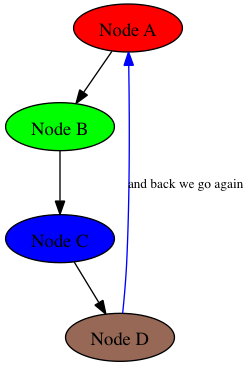

In [25]:
from IPython.display import Image
Image(filename='tree1.png')

In [11]:
!open tree.png

In [37]:
from sklearn.manifold import SpectralEmbedding

In [38]:
%pwd

u'/Users/yoavfreund/Downloads/notebooks'

In [39]:
!ls *.ipynb

Visualizing Graph Laplacian eigenvectors.ipynb
julaiti.ipynb
plot_lle_digits.ipynb


In [40]:
# Authors: Fabian Pedregosa <fabian.pedregosa@inria.fr>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#          Gael Varoquaux
# License: BSD 3 clause (C) INRIA 2011

print(__doc__)
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30



pydot example 2
@author: Federico Cáceres
@url: http://pythonhaven.wordpress.com/2009/12/09/generating_graphs_with_pydot



In [ ]:
#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

Computing Spectral embedding


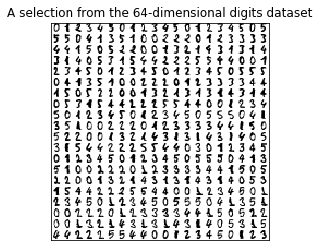

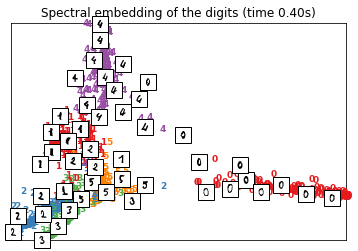

In [46]:
#----------------------------------------------------------------------
# Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')

#----------------------------------------------------------------------
# Spectral embedding of the digits dataset
print("Computing Spectral embedding")
embedder = manifold.SpectralEmbedding(n_components=2, random_state=0,
                                      eigen_solver="arpack")
t0 = time()
X_se = embedder.fit_transform(X)

plot_embedding(X_se,
               "Spectral embedding of the digits (time %.2fs)" %
               (time() - t0))
plt.show()

In [47]:
embedder.

{'affinity': 'nearest_neighbors',
 'eigen_solver': 'arpack',
 'gamma': None,
 'n_components': 2,
 'n_jobs': 1,
 'n_neighbors': None,
 'random_state': 0}

In [20]:
pydot?